In [1]:
import dm_den_viz
import dm_den
import paths
import cropper
import fitting
import lmfit
import pickle
import numpy as np
import pandas as pd
from importlib import reload
from IPython.display import display, Latex
from astropy import units as u, constants as c

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rcParams

rcParams['axes.labelsize']=15.
rcParams['xtick.labelsize'] = 12.
rcParams['ytick.labelsize'] = 12.
rcParams['figure.dpi'] = 110.

mls = 11. #marker label size
#result_figsize = (4.5,3.5) #figure size for the main result plots (rho & sigma)
result_figsize = (4.5,4.8) #figure size for the main result plots (rho & sigma)

Covariance:
[[ 0.0010099  -0.00267152]
 [-0.00267152  0.00744043]]

====  ========  =========  ========  ===========
..       coeff        +/-    t-stat     p-values
====  ========  =========  ========  ===========
X_0   2.15683   0.0333991  67.8698   1.17684e-14
X_1   0.802391  0.0906557   9.30223  3.07187e-06
====  ========  =========  ========  ===========
t_c = 1.1
t-test type: 2 tailed, 32% significance

=======  =======  ==============
      F      F_c    significance
=======  =======  ==============
86.5314  10.0443            0.01
=======  =======  ==============
r2 = 0.90
r2a = 0.89

========  ========
     x_i     coeff
========  ========
1         2.15683
0.359835  0.802391
========  ========
=======  =======  =====================  ===============  ==================  ===========
   yhat      t_c    std err of forecast    t_c * std err    dY/dX1 * err(X1)    err(yhat)
=======  =======  =====================  ===============  ==================  ===========
2.44556  1.05098 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

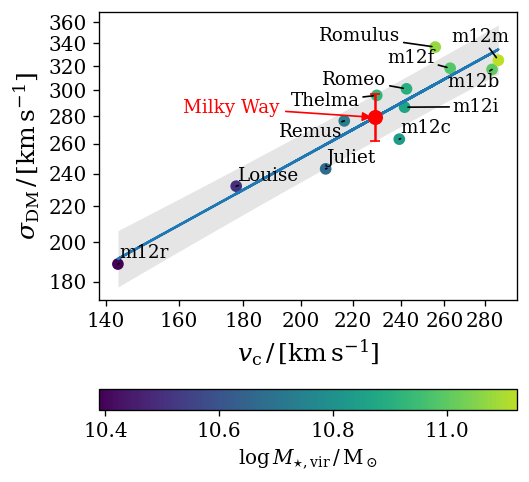

[array([[278.96879764]]), [array([17.87811986, 16.80137912])]]

In [52]:
dm_den_viz.plt_vs_vc('disp_dm_disc_cyl', 
                     source_fname = 'dm_stats_20221208_v100.h5',
                     tgt_fname='disp_vs_vphi.png',
                     update_val=True,
                     figsize=result_figsize, labelsize=mls, 
                     minarrow=0.2,
                     adjust_text_kwargs={#'expand_points':(1.5,1.5),
                                         #'force_points':(.2,2.),
                                         #'expand_text':(1.05,2.),
                                         #'expand_objects':(1.3,1.3),
                                         #'force_objects':(0.3,0.3)
                                        },
                     dpi_show=120, 
                     xtickspace=0.2, 
                     ytickspace=20.,
                     verbose=True, beta_sig=1.-0.682, 
                     color='masses'
                    )

Covariance:
[[ 0.00489177 -0.01294041]
 [-0.01294041  0.0360402 ]]

====  ========  =========  ========  ===========
..       coeff        +/-    t-stat     p-values
====  ========  =========  ========  ===========
X_0   6.7576    0.0735071  96.6182   2.22045e-16
X_1   0.799033  0.199522    4.20892  0.001803
====  ========  =========  ========  ===========
t_c = 1.1
t-test type: 2 tailed, 32% significance

======  =======  ==============
     F      F_c    significance
======  =======  ==============
17.715  10.0443            0.01
======  =======  ==============
r2 = 0.64
r2a = 0.60

========  ========
     x_i     coeff
========  ========
1         6.7576
0.359835  0.799033
========  ========
=======  =======  =====================  ===============  ==================  ===========
   yhat      t_c    std err of forecast    t_c * std err    dY/dX1 * err(X1)    err(yhat)
=======  =======  =====================  ===============  ==================  ===========
7.04512  1.05098          

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

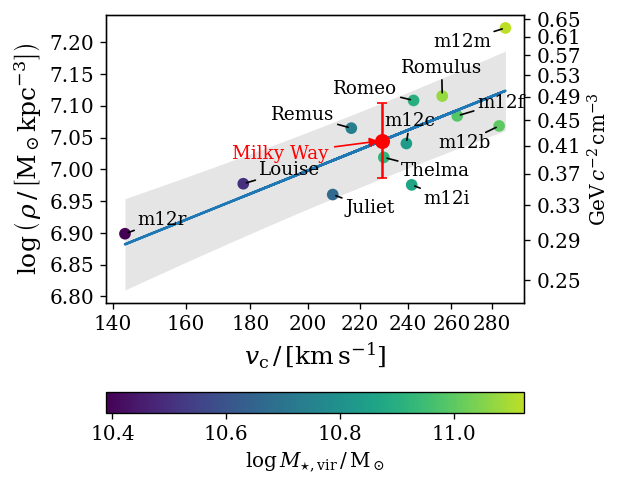

In [53]:
reload(dm_den_viz)
reload(dm_den)
rho_hat = dm_den_viz.plt_vs_vc('den_disc',
                               source_fname = 'dm_stats_20221208_v100.h5',
                               tgt_fname='den_vs_vphi.png',
                               update_val=True,
                               minarrow=0.03,
                               adjust_text_kwargs={'expand_points':(1.5,1.5),
                                                   #'force_points':(1.2,1.3)
                                                  },
                               figsize=result_figsize, labelsize=mls, 
                               verbose=True,
                               v0=dm_den_viz.v0_eilers,
                               dv0=dm_den_viz.dv0_eilers,
                               dpi_show=120,
                               xtickspace=0.2, beta_sig=1.-0.682, 
                               color='masses')

100% |########################################################################|


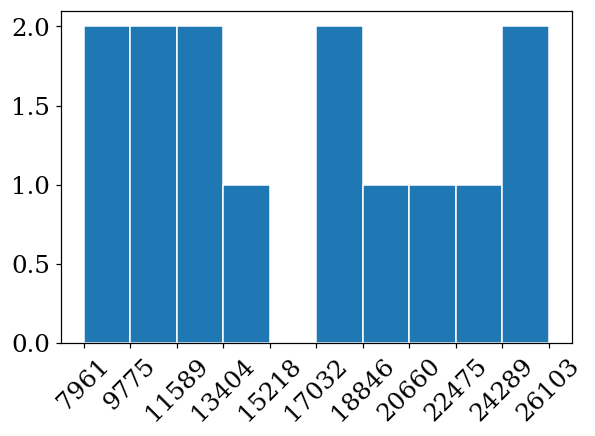

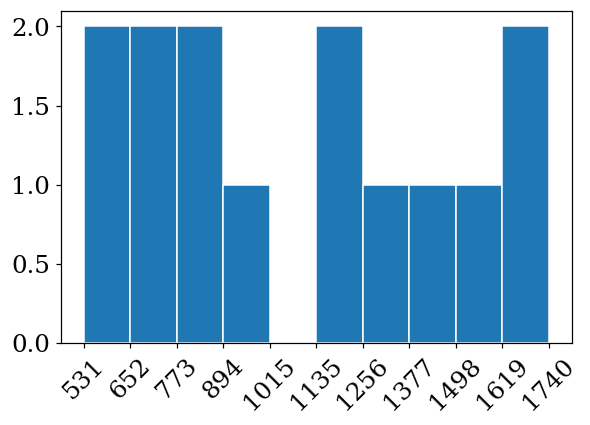

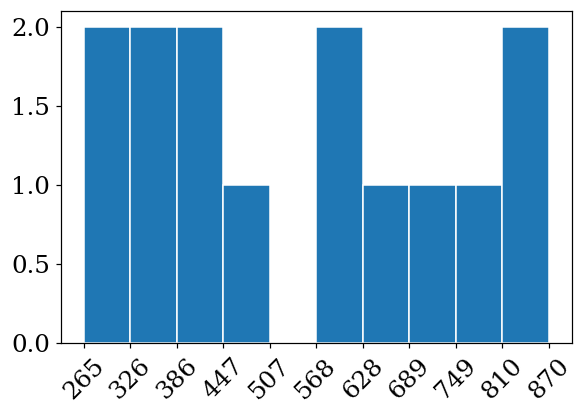

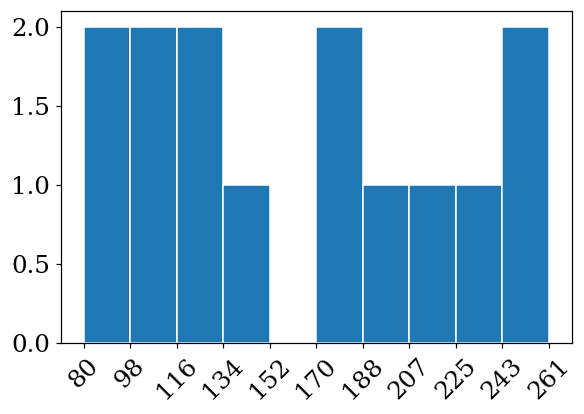

In [27]:
dm_den_viz.plt_particle_counts()

0.5215043804959058


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

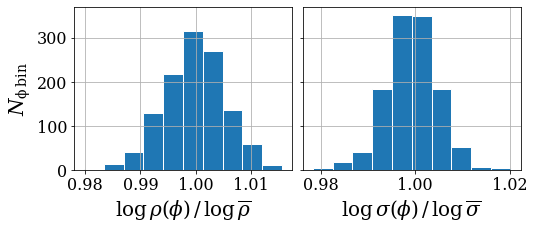

1.7383479349863522


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

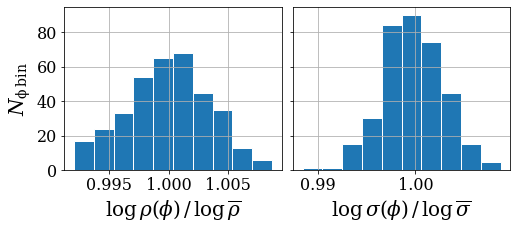

2.6075219024795286


In [14]:
print(2.*np.pi/100.*8.3)
dm_den_viz.plt_disc_diffs(diff_source='den_disp_dict_N100_20220927.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)
print(2.*np.pi*8.3/30.)
dm_den_viz.plt_disc_diffs(diff_source='den_disp_dict_N30_20220927.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)

3.4766958699727044


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

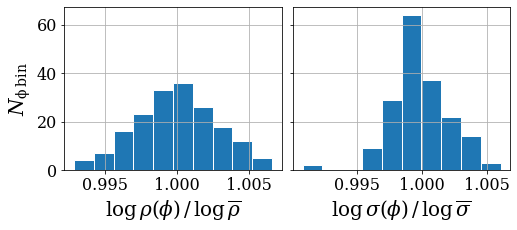

In [16]:
print(2.*np.pi*8.3/15.)
reload(dm_den_viz)
reload(dm_den)
import staudt_utils
reload(staudt_utils)
dm_den_viz.plt_disc_diffs(only_log=True, figsize=(8,3),
                          tgt_fname='disc_diffs.png',
                          update_val=True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

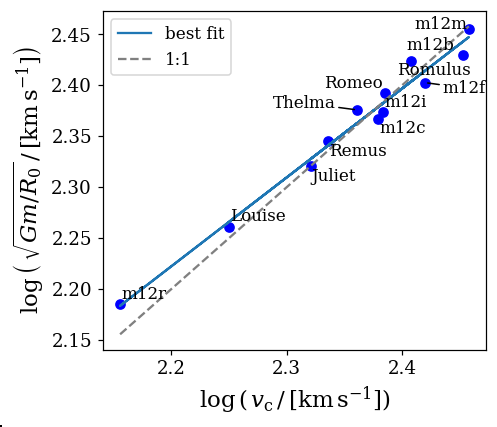

In [5]:
dm_den_viz.plt_gmr_vs_vc(figsize=(4.5,4), minarrow=0.03)

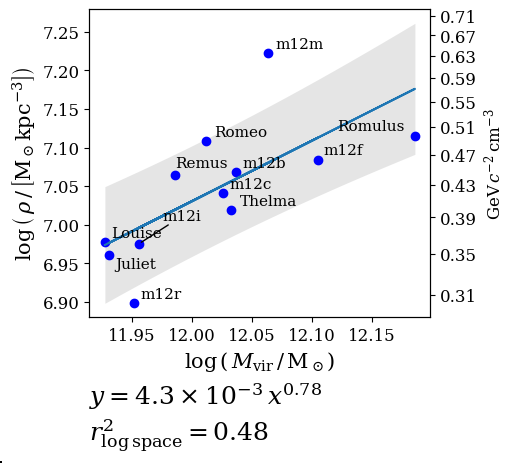

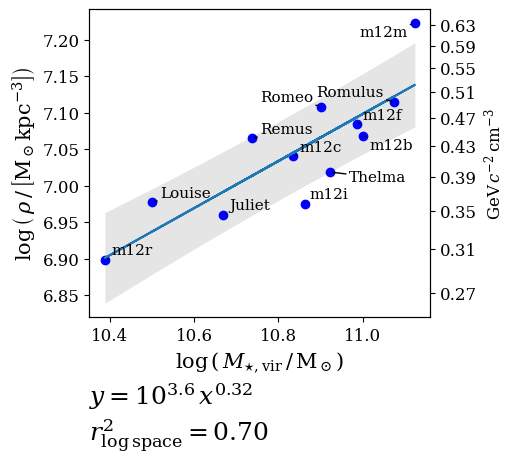

In [52]:
_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                   ycol='den_disc', xcol='mvir_fromhcat',
                   ylabel=dm_den_viz.den_label,
                       xlabel='$M_\mathrm{vir}\,/\,\mathrm{M}_\odot$',
                   xadjustment='log', yadjustment='log', dropgals=['m12w','m12z'],
                   figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                   adjust_text_kwargs={'expand_points':(1.3,1.3)},
                   labelsize=mls, 
                       show_formula=True, formula_y=-0.4,
                   tgt_fname=None, minarrow=0.04,  
                       ax_slr_kwargs={'show_band':True})

_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                   ycol='den_disc', xcol='mvir_stellar',
                   ylabel=dm_den_viz.den_label, 
                       xlabel='$M_\mathrm{\star,vir}\,/\,\mathrm{M}_\odot$',
                   xadjustment='log', yadjustment='log', dropgals=['m12w','m12z'],
                   figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                   adjust_text_kwargs={'expand_points':(1.3,1.3)},
                   labelsize=mls, 
                       show_formula=True, formula_y=-0.4,
                   tgt_fname=None, minarrow=0.04,  
                       ax_slr_kwargs={'show_band':True})

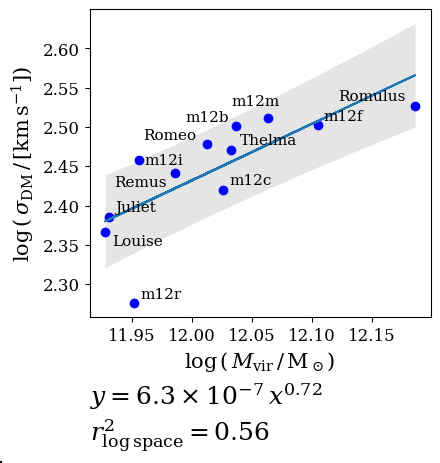

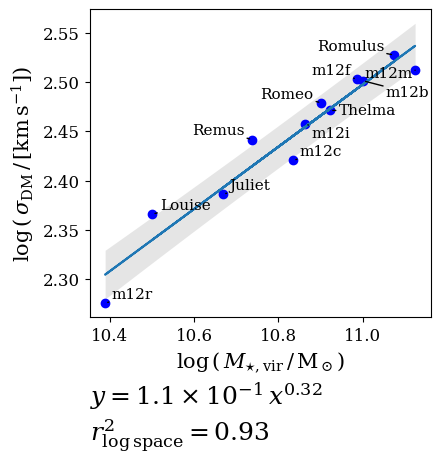

In [51]:
_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                   ycol='disp_dm_disc_cyl', xcol='mvir_fromhcat',
                   ylabel=dm_den_viz.disp_label, 
                       xlabel='$M_\mathrm{vir}\,/\,\mathrm{M}_\odot$',
                   xadjustment='log', yadjustment='log', 
                       dropgals=['m12w','m12z'],
                   figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                   adjust_text_kwargs={'expand_points':(1.3,1.3)},
                   labelsize=mls, 
                       show_formula=True, formula_y=-0.4,
                       tgt_fname=None, 
                       minarrow=0.04,  
                       ax_slr_kwargs={'show_band':True})

_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                   ycol='disp_dm_disc_cyl', xcol='mvir_stellar',
                   ylabel=dm_den_viz.disp_label, 
                       xlabel='$M_\mathrm{\star,vir}\,/\,\mathrm{M}_\odot$',
                   xadjustment='log', yadjustment='log', 
                       dropgals=['m12w','m12z'],
                   figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                   adjust_text_kwargs={'expand_points':(1.3,1.3)},
                   labelsize=mls, 
                       show_formula=True, formula_y=-0.4,
                       tgt_fname=None, 
                       minarrow=0.04,  
                       ax_slr_kwargs={'show_band':True})

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

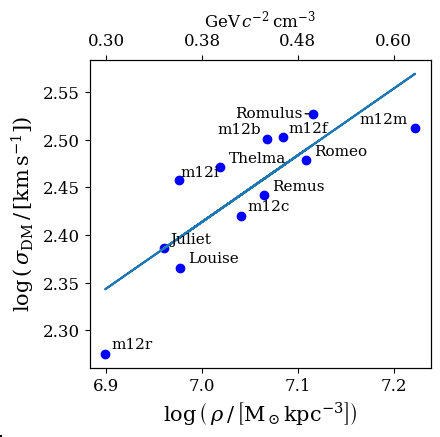

In [39]:
_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                   'den_disc', 'disp_dm_disc_cyl',
                   dm_den_viz.den_label, dm_den_viz.disp_label,
                   'log', 'log', dropgals=['m12w','m12z'],
                   figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                   adjust_text_kwargs={'expand_points':(1.3,1.3)},
                   labelsize=mls, show_formula='outside',
                   tgt_fname='disp_vs_den.png', minarrow=0.04,
                   #ax_slr_kwargs={'prediction_x':[[dm_den_viz.rho_sofu],
                   #                               10.**rho_hat[0][0]],
                   #               'dX':[[dm_den_viz.drho_sofu],
                   #                      rho_hat[1][0] \
                   #                      *np.sqrt(10.**(rho_hat[0][0][0]*2.) \
                   #                               * np.log(10.)**2.)]}
                      )
# The extra math on the error bar from my prediction is to get the
# log error bar into a linear error bar that the program will then
# convert back into the original error bar. (The program expects linear
# error bars, even though it might display log error bars in the end.)

#print(_)

In [148]:
df = dm_den.load_data('dm_stats_20220715.h5').drop(['m12w', 'm12z'])
cor_df = df \
    [['disp_dm_disc_cyl',
      'den_disc',
      'v_dot_phihat_disc(T<=1e3)',
      'vcirc']] \
    .rename(columns={'disp_dm_disc_cyl': '$\sigma_\mathrm{3D}$', 
                     'den_disc': '$\rho$',
                     'v_dot_phihat_disc(T<=1e3)': '$v_c$',
                     'vcirc': '$\sqrt{Gm/R_0}$'}) \
    .corr()
for i in range(cor_df.shape[0]):
    for j in range(cor_df.shape[1]):
        if j>i:
            cor_df.iloc[i,j] = ''
caption = 'Correlations between the four variables of interest'
with open(paths.tables+'corr.tex','w') as tf:
    l = cor_df.to_latex(escape=False,
                        float_format='{:0.2f}'.format,
                        caption=caption,
                        label='table:corr')
    tf.write(l)
cor_df

/var/folders/94/r7q1ltfd5cdf55qhtt067d380000gn/T/ipykernel_46298/163943358.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  l = cor_df.to_latex(escape=False,


,$\sigma_\mathrm{3D}$,$\rho$,$v_c$,$\sqrt{Gm/R_0}$
$\sigma_\mathrm{3D}$,1.000000,,,
$\rho$,0.784196,1.0,,
$v_c$,0.929061,0.778319,1.0,
$\sqrt{Gm/R_0}$,0.963847,0.829554,0.984716,1.0


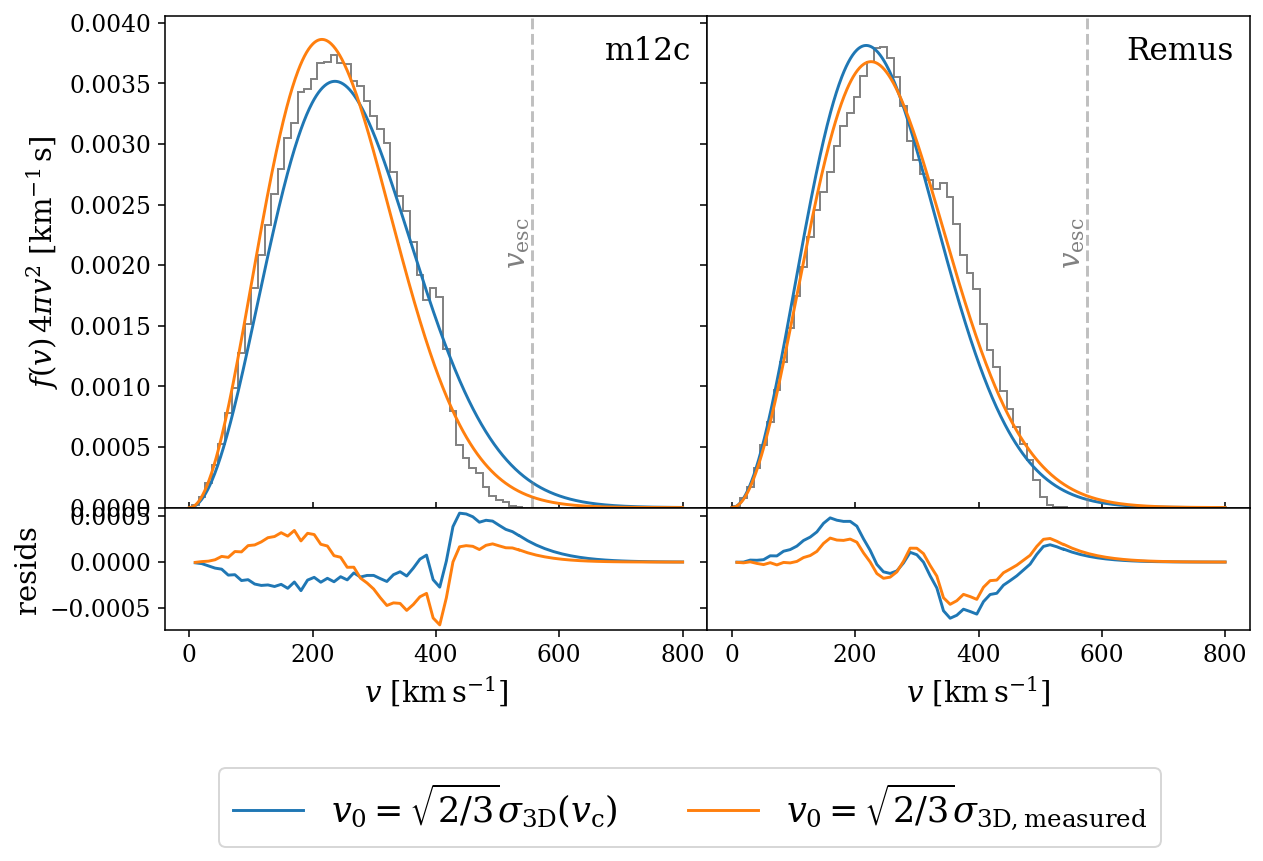

In [51]:
reload(fitting)
fitting.plt_naive(gals=['m12c', 'Remus'],
                  tgt_fname='distribs_from_predicted_sigma.png')

100% |####################################################################################################|


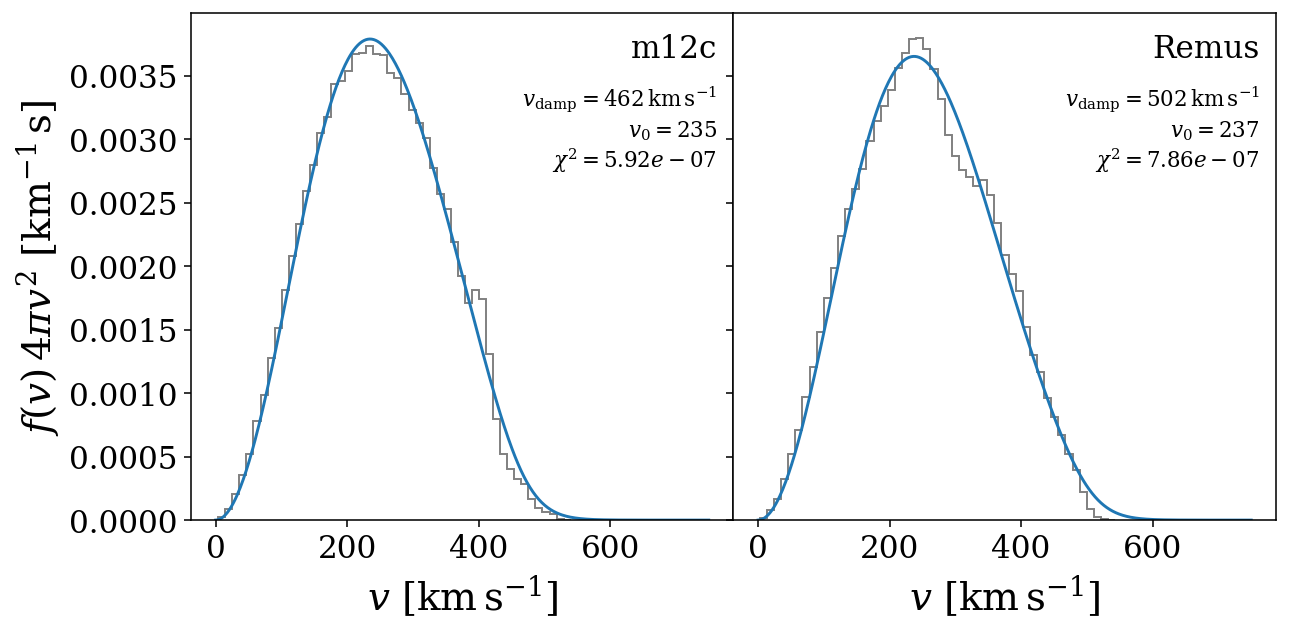

{'m12c': 461.8270824427958, 'Remus': 501.90045185756355}

In [124]:
fitting.fit_vdamp(gals=['m12c', 'Remus'],
                  tgt_fname='vdamp_fits.png')

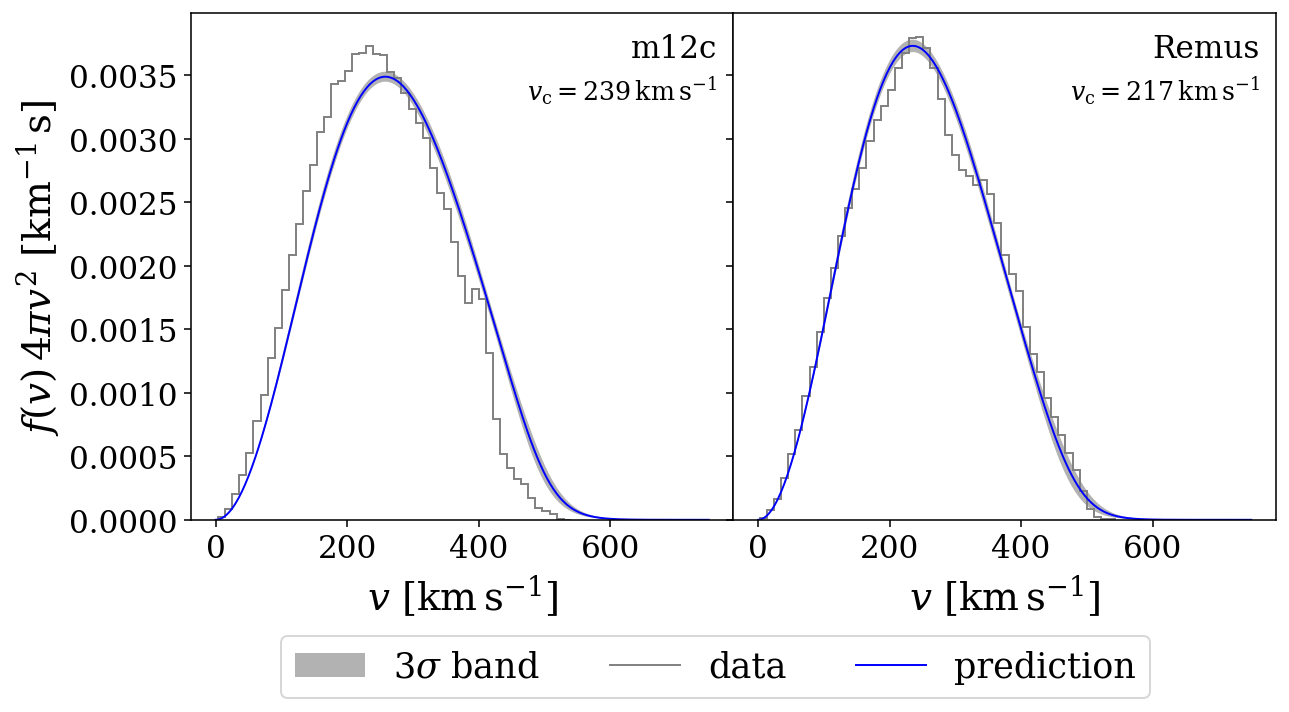

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 600
    # variables        = 4
    chi-square         = 4.0224e-05
    reduced chi-square = 6.7490e-08
    Akaike info crit   = -9902.78324
    Bayesian info crit = -9885.19552
    R-squared          = 0.96253566
[[Variables]]
    d:  114.970057 +/- 1.47341595 (1.28%) (init = 114.9701)
    e:  0.92818207 +/- 0.01713926 (1.85%) (init = 0.9281819)
    h:  388.227640 +/- 23.9925956 (6.18%) (init = 388.2275)
    j:  0.27035451 +/- 0.06556165 (24.25%) (init = 0.2703549)
    k:  0.03089876 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(h, j) = -0.990
    C(d, e) = -0.945
    C(d, j) = 0.391
    C(d, h) = -0.361
    C(e, j) = -0.310
    C(e, h) = 0.255


In [16]:
result = fitting.plt_universal(gals=['m12c', 'Remus'], update_values=True, 
                               tgt_fname='universal_fits.png')
print(lmfit.fit_report(result))

In [110]:
print(df[['v_dot_phihat_disc(T<=1e4)']])
print(df[['disp_dm_disc_cyl']]*np.sqrt(2./3.))

         v_dot_phihat_disc(T<=1e4)
m12b                    283.758511
m12c                    239.454005
m12f                    262.815787
m12i                    241.807572
m12m                    287.058091
m12r                    143.081819
Romeo                   242.638363
Juliet                  209.268099
Romulus                 255.713238
Remus                   216.513182
Thelma                  229.776173
Louise                  177.666405
         disp_dm_disc_cyl
m12b           258.899934
m12c           214.950154
m12f           259.718995
m12i           234.081655
m12m           265.305854
m12r           154.017399
Romeo          245.829013
Juliet         198.562230
Romulus        274.836290
Remus          225.670464
Thelma         241.569790
Louise         189.593715


In [16]:
def make_param_table():
    data_strings = np.loadtxt(paths.paper + 'data.txt', delimiter=',', 
                              dtype=str)
    d = {string[0]: string[1] for string in data_strings}
    #display(d)
    params = ['rho_GeV', 'logrho',
              'logden_intercept', 'den_slope',
              'disp',
              'disp_amp', 'disp_slope', 
              'd', 'e', 'h', 'j']
    uncertainties = {}
    table_data = {}
    for key in params:
        err = d['d' + key]
        if err == 'n/a':
            errplus = d['d' + key + '_plus']
            errminus = d['d' + key + '_minus']
            err = '^{' + errplus + '}_{' + errminus + '}'
        table_data[key] = '$' + d[key] + '\pm' + err + '$' 
        uncertainties[key] = err
    display(table_data)
    kms = '$\mathrm{km\,s^{-1}}$'
    units = dict(disp = kms, disp_amp = kms, disp_slope = '', logrho = '',
                 rho_GeV = '$\mathrm{GeV}\,c^{-2}\,\mathrm{cm^{-3}}$',
                 logden_intercept = '', den_slope = '', d = kms, e = '', 
                 h = kms, j = '')
    df = pd.DataFrame(index = params, 
                      data=[[table_data[param], units[param]] 
                             for param in params],
                      columns=['Best estimate', 
                               'Units'])
    #df.index.name = 'parameter'
    mapper = {'disp': '$\sigma_\mathrm{3D}(v_{\mathrm{c,MW}})$',
             'disp_amp': '$\sigma_0$',
             'disp_slope': '$\gamma$',
             'logrho': 
                 '$\log'
                 '\dfrac{\\rho(v_\mathrm{c,MW})}'
                 '{\mathrm{M_\odot\,kpc^{-3}}}'
                 '$',
             'rho_GeV': '$\\rho(v_\mathrm{c,MW})$',
             'logden_intercept': 
                 '$\log'
                 '\dfrac{\\rho_0}'
                 '{\mathrm{M_\odot\,kpc^{-3}}}'
                 '$',
             'den_slope': '$\\alpha$',
             'd': '$d$', 'e': '$e$', 'h': '$h$', 'j': '$j$'}
    for param in params:
        df.loc[param, 'Parameter'] = mapper[param]
    cols = df.columns.tolist()
    cols = cols[2:] +  cols[:2]
    df = df[cols]

    s = df.style
    s.hide(axis='index')
    with open(paths.tables+'params.tex','w') as tf:
        l = s.to_latex(hrules=True,
                       caption='Parameters',
                       label='tab:params',
                       environment='table',
                       position_float='centering')
        tf.write(l)
    return s
param_df = make_param_table()
param_df

{'rho_GeV': '$0.42\\pm^{0.06}_{0.05}$',
 'logrho': '$7.05\\pm0.06$',
 'logden_intercept': '$6.76\\pm0.07$',
 'den_slope': '$0.80\\pm0.20$',
 'disp': '$279\\pm^{18}_{17}$',
 'disp_amp': '$143\\pm11$',
 'disp_slope': '$0.80\\pm0.09$',
 'd': '$115.0\\pm1.5$',
 'e': '$0.928\\pm0.017$',
 'h': '$390\\pm20$',
 'j': '$0.27\\pm0.07$'}

Parameter,Best estimate,Units
"$\rho(v_\mathrm{c,MW})$",$0.42\pm^{0.06}_{0.05}$,"$\mathrm{GeV}\,c^{-2}\,\mathrm{cm^{-3}}$"
"$\log\dfrac{\rho(v_\mathrm{c,MW})}{\mathrm{M_\odot\,kpc^{-3}}}$",$7.05\pm0.06$,
"$\log\dfrac{\rho_0}{\mathrm{M_\odot\,kpc^{-3}}}$",$6.76\pm0.07$,
$\alpha$,$0.80\pm0.20$,
"$\sigma_\mathrm{3D}(v_{\mathrm{c,MW}})$",$279\pm^{18}_{17}$,"$\mathrm{km\,s^{-1}}$"
$\sigma_0$,$143\pm11$,"$\mathrm{km\,s^{-1}}$"
$\gamma$,$0.80\pm0.09$,
$d$,$115.0\pm1.5$,"$\mathrm{km\,s^{-1}}$"
$e$,$0.928\pm0.017$,
$h$,$390\pm20$,"$\mathrm{km\,s^{-1}}$"
